In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("../app/bat_aaa_900mAh_t2-lamp.csv", parse_dates=["read_at", "timestamp"])
#df = pd.read_csv("../app/nodemcu-10_10-t1.csv")
#df = pd.read_csv("../app/led-t1.csv")

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-07 12:05:45.836230,191,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
1,1,2025-02-07 12:05:45.895312,250,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
2,2,2025-02-07 12:05:45.995363,350,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
3,3,2025-02-07 12:05:46.095381,450,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
4,4,2025-02-07 12:05:46.195229,550,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
...,...,...,...,...,...,...,...,...
5239,5239,2025-02-07 12:14:30.554103,524855,2025-02-07 12:14:30,1.008,0.0000,0.00000,0.00000
5240,5240,2025-02-07 12:14:30.652260,524953,2025-02-07 12:14:30,1.008,0.0000,0.00000,0.00000
5241,5241,2025-02-07 12:14:30.770075,525071,2025-02-07 12:14:30,1.008,0.0000,0.00000,0.00000
5242,5242,2025-02-07 12:14:30.850082,525151,2025-02-07 12:14:30,1.008,0.0000,0.00000,0.00000


In [2]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-07 12:05:45.836230,191,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
1,1,2025-02-07 12:05:45.895312,250,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
2,2,2025-02-07 12:05:45.995363,350,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
3,3,2025-02-07 12:05:46.095381,450,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
4,4,2025-02-07 12:05:46.195229,550,1970-01-01 00:00:00,1.328,0.0004,0.00053,0.00004
...,...,...,...,...,...,...,...,...
5239,5239,2025-02-07 12:14:30.554103,524855,2025-02-07 12:14:30,1.008,0.0000,0.00000,0.00000
5240,5240,2025-02-07 12:14:30.652260,524953,2025-02-07 12:14:30,1.008,0.0000,0.00000,0.00000
5241,5241,2025-02-07 12:14:30.770075,525071,2025-02-07 12:14:30,1.008,0.0000,0.00000,0.00000
5242,5242,2025-02-07 12:14:30.850082,525151,2025-02-07 12:14:30,1.008,0.0000,0.00000,0.00000


Text(0.5, 1.0, 'Current')

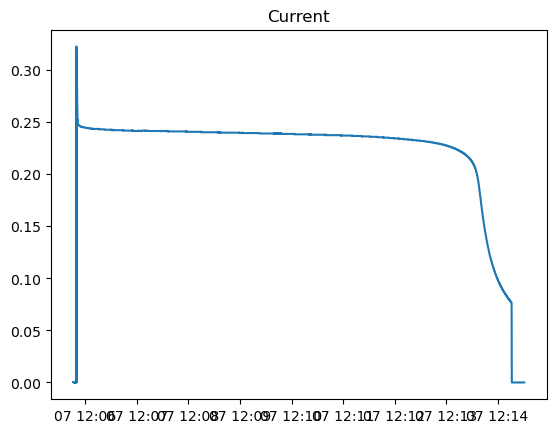

In [3]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

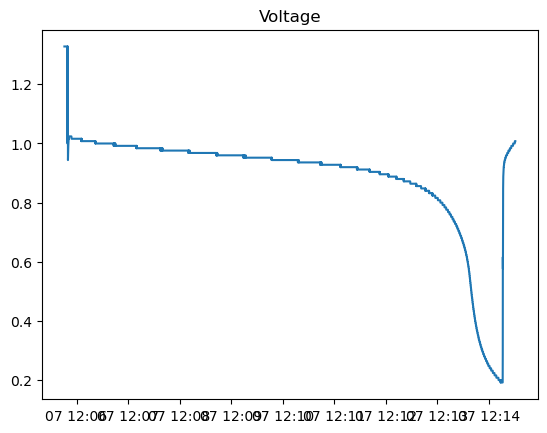

In [4]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [5]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapz(current_data, time_data)
total_current

115.4587360392

In [6]:
time_span = max(time_data)
time_span

525.114816

In [7]:
avg_current = total_current / time_span
avg_current

0.21987331631336032

In [8]:
bat_usable_cap = 0.8 #Amp hour
runtime = bat_usable_cap / avg_current
runtime #hours

3.6384587880588994

# etc

In [9]:
#v = i * r
#i = v / r
v_bat = 0.94 #volts
c_bat = .8 #Ah
r = 4.5 #ohms

i  = v_bat / r
print(f"{i} A")
p = v_bat * i
print(f"{p} W")

run = c_bat / i
print(f"{run} hours")

0.20888888888888887 A
0.19635555555555553 W
3.829787234042554 hours


In [10]:
1/((1/47)+(1/4.7))

4.2727272727272725